# Dataset Preprocessing

This notebook include how we do dataset preprocessing before publishing the dataset to [Kaggle](https://www.kaggle.com/).

Our raw dataset directory looks something like this:
```
|- BATIK
    |- Batik Bali
    |- Batik Betawi
    |- Batik Cendrawasih
    |- etc.
```

Feel free to access the raw dataset through this [link](https://drive.google.com/drive/folders/1GLMPzzCYiA-YQAQn-wahzrVOicTHM6Su?usp=sharing)

We want the final dataset directory to look something like this:
```
|- DATASET
    |- TRAIN
        |- Batik Bali
        |- Batik Betawi
        |- Batik Cendrawasih
        |- etc.
    |- TEST
        |- Batik Bali
        |- Batik Betawi
        |- Batik Cendrawasih
        |- etc.
```

## Import All Dependencies

Make sure that you've already installed all the dependencies from `requirements.txt`.

If you haven't, uncomment the code in the cell below to do installation using `pip install`

In [ ]:
# !pip install -r requirements.txt

In [1]:
import cv2
import os
import matplotlib.pyplot as plt
import numpy as np
import random

## Validate the Data
List all available motives folder inside the `BATIK` folder.

You can see all the names stored into `batik_motives` list which we will be using very soon.

In [2]:
batik_motives = os.listdir("BATIK")
print (batik_motives)

['Batik Sekar Jagad', 'Batik Cendrawasih', 'Batik Dayak', 'Batik Insang', 'Batik Ikat Celup', 'Batik Lasem', 'Batik Megamendung', 'Batik Betawi', 'Batik Pala', 'Batik Kawung', 'Batik Tambal', 'Batik Poleng', 'Batik Geblek Renteng', 'Batik Bali', 'Batik Parang']


## Create Destination Directory Structure
The code inside the cell below will create folder structure as mentioned earlier.

In [3]:
cwd = os.getcwd()
print (cwd)

if os.path.exists("DATASET"):
    print("Directory is already created!")
else:
    print("Creating DATASET directory ...")
    for motive in batik_motives:
        os.makedirs(os.path.join(cwd,"DATASET","TRAIN",motive))
        os.makedirs(os.path.join(cwd,"DATASET","TEST",motive))
    print("DATASET directory is created!")

/Users/alfanme/Documents/Semester 6/Bangkit/capstone_corak/machine_learning
Creating DATASET directory ...
DATASET directory is created!


## Check the Dataset Amount for Each Class
As we've already collected the dataset from different sources, it's important to check whether the data is balance for each class. You can see the **Bar Chart** representing the dataset distribution.

The dataset is pretty small due to the lack of online recourses, we only have around 90-166 images for each Batik motive.

Batik Sekar Jagad --> 93
Batik Cendrawasih --> 120
Batik Dayak --> 124
Batik Insang --> 90
Batik Ikat Celup --> 95
Batik Lasem --> 112
Batik Megamendung --> 93
Batik Betawi --> 119
Batik Pala --> 91
Batik Kawung --> 90
Batik Tambal --> 91
Batik Poleng --> 91
Batik Geblek Renteng --> 93
Batik Bali --> 120
Batik Parang --> 166


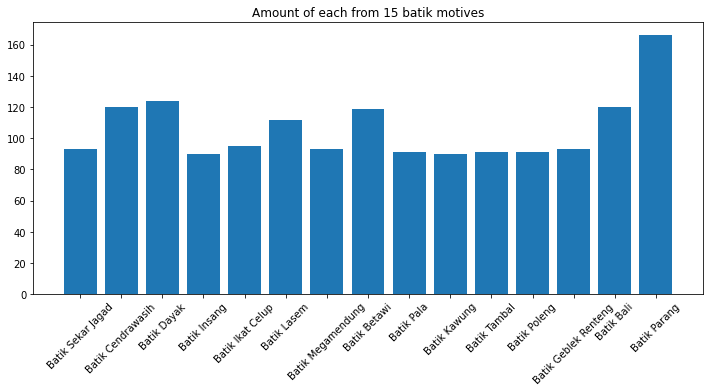

In [8]:
data_count = []
for motive in batik_motives:
    count = len(os.listdir(os.path.join(cwd, "BATIK", motive)))
    print(f'{motive} --> {count}')
    data_count.append(count)

plt.figure(figsize=(12,5))
plt.title(f"Amount of each from {len(batik_motives)} batik motives")
plt.bar(batik_motives, data_count)
plt.xticks(rotation=45)
plt.show()

## Final Execution
This is the main step for dataset preprocessing. There are a lot of things are going on in the cell below.

1. Keep the maximum dataset size is 90 images to maintain the balance
1. Set training split size into 70 images and test split 20 images
1. Loop through each motives folder and randomize/shuffle the filenames list
1. Open each image file using openCV and resize it into 224x224
1. Save as .jpg and rename the first 70 images into `DATASET/TRAIN` folder and the rest 20 images into `DATASET/TEST` folder

After all the process finished, we can see that our `DATASET` directory is now populated by clean, similar size, and balanced dataset of 15 Batik motives.

In [4]:
dataset_size = 90
train_size = 70

for motive in batik_motives:
    print(motive)
    filenames = os.listdir(os.path.join("BATIK",motive))
    filenames = random.sample(filenames, dataset_size)
    for idx, name in enumerate(filenames):
        image = cv2.imread(os.path.join(cwd,"BATIK",motive,name))
        image = cv2.resize(image,(224,224),interpolation = cv2.INTER_AREA)
        if idx < train_size:
            cv2.imwrite(os.path.join(cwd,"DATASET","TRAIN", motive, str(idx)+".jpg"),image)
        else:
            cv2.imwrite(os.path.join(cwd,"DATASET","TEST", motive, str(idx)+".jpg"),image)

Batik Sekar Jagad
Batik Cendrawasih
Batik Dayak
Batik Insang
Batik Ikat Celup
Batik Lasem
Batik Megamendung
Batik Betawi
Batik Pala
Batik Kawung
Batik Tambal
Batik Poleng
Batik Geblek Renteng
Batik Bali
Batik Parang


## Last Step
Our last step is to zip the `TRAIN` and `TEST` folder as `DATASET.zip` file. And then publish the `DATASET.zip` into [Kaggle](https://www.kaggle.com/).

We've already done that for you, so you don't have to do so. Here's the [link to our published Batik dataset](https://www.kaggle.com/alfanme/indonesian-batik-motifs-corak-app).